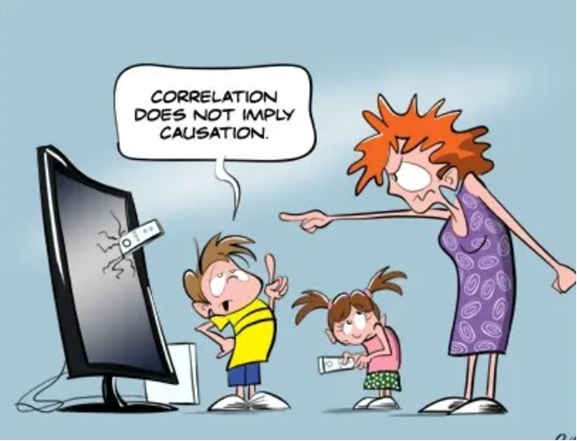

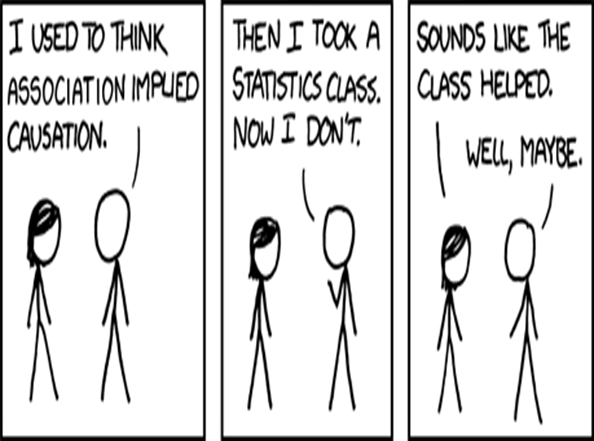

# RANDOMIZED CONTROLLED EXPERIMENTS  _  CAUSALITY

In [24]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
#from google.colab import files

In [25]:
#upload the file baby.csv
#https://www.openintro.org/data/  - Nice site to get safe secure data

In [26]:
#Read the file mammogram.csv
mammogram = pd.read_csv("C:/University/University Files/University-Code/Year 1/Semester 1/Python/Lessons/Data/csv/mammogram.csv")

In [27]:
# Lets view the mammogram dataset
mammogram

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes
...,...,...
89830,control,no
89831,control,no
89832,control,no
89833,control,no


In [28]:
#Determine the listings in the dataset
mammogram.groupby('treatment').size()

treatment
control      44910
mammogram    44925
dtype: int64

In [29]:
#mammogram.groupby('breast_cancer_death').size()
mammogram.groupby('breast_cancer_death').size()

breast_cancer_death
no     88830
yes     1005
dtype: int64

In [30]:
# convert the 'breast_cancer_death' column to an array
mammogram['breast_cancer_death'].values == 'yes'

array([ True,  True,  True, ..., False, False, False])

In [31]:
# Let create a new column based on the previous cell
mammogram['indicator'] = mammogram['breast_cancer_death'].values == 'yes'
mammogram


,treatment,breast_cancer_death,indicator
0,mammogram,yes,True
1,mammogram,yes,True
2,mammogram,yes,True
3,mammogram,yes,True
4,mammogram,yes,True
...,...,...,...
89830,control,no,False
89831,control,no,False
89832,control,no,False
89833,control,no,False


In [32]:
# Since  I really dont need the second column anymore, i guess it is cool to drop the column i.e 'breast_cancer_death'
mammogram = mammogram.drop('breast_cancer_death', axis=1)

In [33]:
mammogram

,treatment,indicator
0,mammogram,True
1,mammogram,True
2,mammogram,True
3,mammogram,True
4,mammogram,True
...,...,...
89830,control,False
89831,control,False
89832,control,False
89833,control,False


In [34]:
#mammogram.groupby('indicator').size()
mammogram.pivot_table(index='treatment',values='indicator')
# another way to get the mean


,indicator
treatment,
control,0.011245
mammogram,0.011130


In [35]:
#Determine the mean of the death in treatment vs the control group
mean_table = mammogram.groupby('treatment').mean()

In [36]:
mean_table

,indicator
treatment,
control,0.011245
mammogram,0.011130


In [37]:
# So let us determine if this is significant, we could determine the difference between the two means
#What is the difference between the death rate for mammogram and control
observed_difference = mean_table.iloc[1,:]-mean_table.iloc[0,:]
observed_difference =observed_difference.to_numpy()[0]

In [38]:
#Create a function to input a table, a label and group label. which would then determine the label difference grouped by the values in group label
def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""

    reduced = table[[label, group_label]]

    mean_table = reduced.groupby(group_label).mean()
    means_difference = mean_table.iloc[1,:]-mean_table.iloc[0,:]

    return means_difference.to_numpy()[0]

In [39]:
#Let's test this function
difference_of_means(mammogram, 'indicator', 'treatment')

np.float64(-0.00011505110015988182)

### Quick Summary from above:
- `iloc` is for when you know the **position** (like "give me the second row").
- `loc` is for when you know the **label** (like "give me the row called 'Bob'").

In [40]:
#Create an array with treatment column being shuffled
shuffled_labels = np.random.permutation(mammogram['treatment'])
shuffled_labels

array(['control', 'control', 'control', ..., 'control', 'control',
       'mammogram'], dtype=object)

In [41]:
#Create a new table original_and_shuffled and add the shuffled labels as a column
original_and_shuffled = mammogram
original_and_shuffled['shuffled Label'] = shuffled_labels
original_and_shuffled

,treatment,indicator,shuffled Label
0,mammogram,True,control
1,mammogram,True,control
2,mammogram,True,control
3,mammogram,True,control
4,mammogram,True,mammogram
...,...,...,...
89830,control,False,control
89831,control,False,control
89832,control,False,control
89833,control,False,control


In [42]:
#determine the difference mean in indicator for shuffled label
difference_of_means(original_and_shuffled, 'indicator', 'shuffled Label')

np.float64(-0.0006493640220526387)

In [43]:
#determine the difference mean in indicator for treatment
difference_of_means(original_and_shuffled,'indicator','treatment')

np.float64(-0.00011505110015988182)

In [44]:
#Let's put this all into a function
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""

    # array of shuffled labels
    shuffled_labels = np.random.permutation(table[group_label])

    # table of numerical variable and shuffled labels
    table['Shuffled Label'] = shuffled_labels

    return difference_of_means(table, label, 'Shuffled Label')

In [45]:
#Test this function
one_simulated_difference(mammogram, 'indicator','treatment')

np.float64(-0.0006493640220526387)

In [46]:
#Let's run this multiple times
differences = []
for i in np.arange(50):
  new_difference = one_simulated_difference(mammogram, 'indicator','treatment')
  differences.append(new_difference)

In [47]:
# Diffrences
differences=np.array(differences)
differences

array([-1.13915087e-03, -2.59989465e-05,  7.30944360e-04,  5.52840052e-04,
        7.75470436e-04, -3.37681484e-04,  8.19996513e-04, -9.61046560e-04,
        5.97366129e-04, -5.15785792e-04,  1.17620513e-03, -6.49364022e-04,
       -8.71994406e-04, -7.38416176e-04,  5.08313975e-04, -3.37681484e-04,
       -2.59989465e-05,  2.41157514e-04,  1.07579284e-04,  3.30209668e-04,
       -2.59989465e-05, -5.15785792e-04,  5.52840052e-04,  4.19261822e-04,
       -1.27272910e-03,  9.09048667e-04,  9.98100820e-04, -1.00557264e-03,
        9.98100820e-04, -6.04837945e-04,  6.41892206e-04, -1.00557264e-03,
        1.35430944e-03, -6.49364022e-04,  1.52105361e-04, -4.26733638e-04,
       -2.59989465e-05, -2.04103254e-04,  1.13167905e-03, -9.16520483e-04,
        1.96631438e-04, -4.26733638e-04,  9.53574744e-04,  5.52840052e-04,
       -4.26733638e-04,  2.41157514e-04, -8.71994406e-04,  1.85271303e-05,
       -2.48629331e-04, -7.82942253e-04])

# Basic Monte Carlo

Observed Difference: -0.00011505110015988182


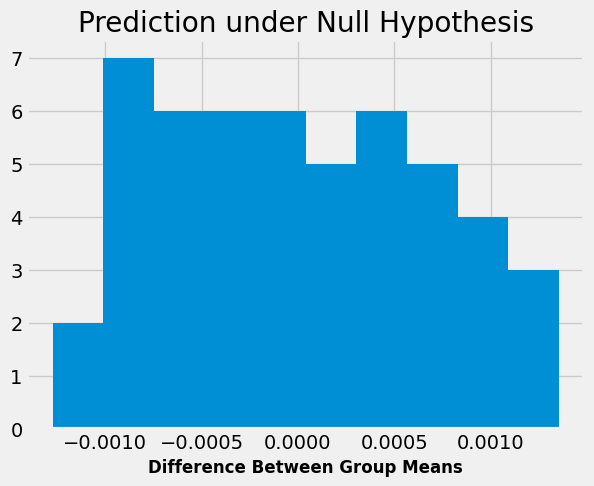

In [48]:
#Let's plot the distribution from the results above
table = pd.DataFrame({'Difference Between Group Means' : differences})
table.hist('Difference Between Group Means')


plots.title('Prediction under Null Hypothesis')
plots.xlabel('Difference Between Group Means', fontsize=12 ,fontweight='bold')





print('Observed Difference:', observed_difference)



# P-value

In [49]:
np.count_nonzero(differences <=   observed_difference)/50

0.44